In [54]:
import pandas as pd

In [55]:
from aicentro.session import Session
session = Session(verify=False)

In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.optimizers import RMSprop

In [57]:
voc_df = pd.read_csv('/aihub/workspace/AIProject_202007/Data/voc_preScale_final_2_20200721.csv', encoding = 'UTF-8')

In [58]:
batch_size = 50
num_classes = 2
epochs = 200

In [59]:
del voc_df['상담일자']
del voc_df['해지일']
del voc_df['cnslt_rscs_diff']

In [62]:
voc_df[voc_df['rscs_yn']==True]

,Unnamed: 0,상담대분류,상담중분류,상담소분류,상품구분,급지,AS신청유형,AS원인유형,AS처리유형,AS처리시간,rscs_yn
6,6,4,10,27,0,3,25,86,68,-1.0,True
22,22,4,10,27,0,5,25,86,68,-1.0,True
24,24,2,11,23,1,2,25,86,68,-1.0,True
40,40,4,10,27,0,6,25,86,68,-1.0,True
47,47,3,7,47,1,3,25,86,68,-1.0,True
...,...,...,...,...,...,...,...,...,...,...,...
40386,40386,3,4,47,1,6,25,86,68,-1.0,True
40397,40397,0,11,34,2,3,25,86,68,-1.0,True
40407,40407,3,14,47,1,4,25,86,68,-1.0,True
40432,40432,2,18,54,1,3,25,86,68,-1.0,True


In [63]:
voc_df.dtypes

Unnamed: 0      int64
상담대분류           int64
상담중분류           int64
상담소분류           int64
상품구분            int64
급지              int64
AS신청유형          int64
AS원인유형          int64
AS처리유형          int64
AS처리시간        float64
rscs_yn          bool
dtype: object

In [64]:
ts=voc_df['AS처리시간']
ts.astype('float')

0        -1.0
1        -1.0
2        -1.0
3        16.0
4        -1.0
         ... 
40483    -1.0
40484    -1.0
40485    -1.0
40486    -1.0
40487    -1.0
Name: AS처리시간, Length: 40488, dtype: float64

In [65]:
ts =ts.astype('int')

In [66]:
for i in voc_df['AS처리시간'].head(300).tail(100):
    print(i)

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
49.99
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
22.0
25.0
22.0
-1.0
-1.0
-1.0
2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
25.99
93.0
40.99
-1.0
-1.0
-1.0
-1.0
24.0
16.0
22.0
22.0
25.0
54.0
-1.0
-1.0
-1.0
43.0
31.0
2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0


In [67]:
voc_df['AS처리시간'] = ts

In [68]:
voc_df

,Unnamed: 0,상담대분류,상담중분류,상담소분류,상품구분,급지,AS신청유형,AS원인유형,AS처리유형,AS처리시간,rscs_yn
0,0,4,10,27,0,3,25,86,68,-1,False
1,1,4,10,27,0,4,25,86,68,-1,False
2,2,4,10,27,0,2,25,86,68,-1,False
3,3,2,11,56,1,1,18,75,55,16,False
4,4,4,10,27,0,3,25,86,68,-1,False
...,...,...,...,...,...,...,...,...,...,...,...
40483,40483,2,18,53,1,4,25,86,68,-1,False
40484,40484,2,18,40,1,2,25,86,68,-1,False
40485,40485,3,6,47,1,3,25,86,68,-1,False
40486,40486,2,18,54,1,6,25,86,68,-1,False


In [69]:
del voc_df['Unnamed: 0']

In [70]:
voc_df.dtypes

상담대분류      int64
상담중분류      int64
상담소분류      int64
상품구분       int64
급지         int64
AS신청유형     int64
AS원인유형     int64
AS처리유형     int64
AS처리시간     int64
rscs_yn     bool
dtype: object

In [71]:
voc_df.corr()

,상담대분류,상담중분류,상담소분류,상품구분,급지,AS신청유형,AS원인유형,AS처리유형,AS처리시간,rscs_yn
상담대분류,1.000000,-0.613951,-0.064542,-0.858035,-0.049287,0.100360,0.140734,0.132088,-0.050717,-0.103012
상담중분류,-0.613951,1.000000,0.104928,0.309086,-0.018732,0.046618,0.075836,0.074865,-0.033436,0.123457
상담소분류,-0.064542,0.104928,1.000000,0.150294,-0.015071,0.088229,0.113209,0.117037,-0.069252,0.096098
상품구분,-0.858035,0.309086,0.150294,1.000000,0.086309,-0.118083,-0.162363,-0.155013,0.053440,0.078850
급지,-0.049287,-0.018732,-0.015071,0.086309,1.000000,0.023191,0.014625,0.009234,0.040607,-0.046930
AS신청유형,0.100360,0.046618,0.088229,-0.118083,0.023191,1.000000,0.269823,0.255534,-0.082222,0.017585
AS원인유형,0.140734,0.075836,0.113209,-0.162363,0.014625,0.269823,1.000000,0.911809,-0.137171,0.015896
AS처리유형,0.132088,0.074865,0.117037,-0.155013,0.009234,0.255534,0.911809,1.000000,-0.125798,0.019658
AS처리시간,-0.050717,-0.033436,-0.069252,0.053440,0.040607,-0.082222,-0.137171,-0.125798,1.000000,-0.016561
rscs_yn,-0.103012,0.123457,0.096098,0.078850,-0.046930,0.017585,0.015896,0.019658,-0.016561,1.000000


In [72]:
val_columns = ['상담대분류', '상담중분류', '상담소분류', '상품구분', '급지', 'AS처리시간','AS신청유형', 'AS원인유형', 'AS처리유형', 'rscs_yn']
voc_df = pd.DataFrame(voc_df, columns=val_columns)

In [73]:
voc_df.dtypes

상담대분류      int64
상담중분류      int64
상담소분류      int64
상품구분       int64
급지         int64
AS처리시간     int64
AS신청유형     int64
AS원인유형     int64
AS처리유형     int64
rscs_yn     bool
dtype: object

In [74]:
# # 데이터를 읽고 순서를 섞는다
voc_model_df=voc_df.sample(frac=1).reset_index(drop=True)
voc_model_df

,상담대분류,상담중분류,상담소분류,상품구분,급지,AS처리시간,AS신청유형,AS원인유형,AS처리유형,rscs_yn
0,2,18,48,1,2,-1,25,86,68,True
1,2,18,48,1,0,-1,25,86,68,False
2,4,10,27,0,2,-1,25,86,68,False
3,3,8,41,1,4,25,26,68,54,False
4,2,18,48,1,1,-1,25,86,68,False
...,...,...,...,...,...,...,...,...,...,...
40483,4,10,27,0,1,-1,25,86,68,False
40484,2,18,48,1,4,-1,25,86,68,True
40485,4,10,61,0,1,-1,25,86,68,False
40486,2,18,48,1,2,-1,25,86,68,True


In [75]:
voc_train=voc_model_df.iloc[0:20000,:]
voc_test=voc_model_df.iloc[20000:40488,:]

In [76]:
x_train= voc_train.iloc[:,0:9].values
x_test= voc_test.iloc[:,0:9].values
y_train= voc_train.iloc[:,9:10]
y_test= voc_test.iloc[:,9:10]

In [78]:
y_test

,rscs_yn
20000,True
20001,False
20002,False
20003,False
20004,False
...,...
40483,False
40484,True
40485,False
40486,True


In [79]:
# encoder={k:v for v,k in enumerate(y_train.drop_duplicates())}
# encoder
sets=voc_model_df.iloc[:,9:10].drop_duplicates()["rscs_yn"].tolist()

In [80]:
sets

[True, False]

In [81]:
encoder={k:v for v,k in enumerate(sets)}

In [82]:
y_train=[ encoder[i] for i in y_train["rscs_yn"].tolist() ]

In [83]:
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test=[ encoder[i] for i in y_test["rscs_yn"].tolist() ]
y_test = keras.utils.to_categorical(y_test, num_classes)

In [85]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [86]:
# 데이터 shape 을 확인해 봅니다.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(20000, 9) (20000, 2) (20488, 9) (20488, 2)


In [87]:
model = Sequential()
model.add(Dense(18, activation='relu', input_shape=(9,)))
model.add(Dropout(0.4))
model.add(Dense(20, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(5, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
#'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 18)                180       
_________________________________________________________________
dropout_6 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                380       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [88]:
import  tensorflow.keras.optimizers
dir( tensorflow.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_deprecation_wrapper',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [89]:
epochs=50
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 20000 samples, validate on 20488 samples
Epoch 1/50
20000/20000 [==============================] - 1s 68us/sample - loss: 0.6144 - acc: 0.7966 - val_loss: 0.4653 - val_acc: 0.8438
Epoch 2/50
20000/20000 [==============================] - 1s 52us/sample - loss: 0.4618 - acc: 0.8446 - val_loss: 0.4400 - val_acc: 0.8438
Epoch 3/50
20000/20000 [==============================] - 1s 52us/sample - loss: 0.4435 - acc: 0.8446 - val_loss: 0.4356 - val_acc: 0.8438
Epoch 4/50
20000/20000 [==============================] - 1s 51us/sample - loss: 0.4388 - acc: 0.8446 - val_loss: 0.4329 - val_acc: 0.8438
Epoch 5/50
20000/20000 [==============================] - 1s 53us/sample - loss: 0.4360 - acc: 0.8446 - val_loss: 0.4317 - val_acc: 0.8438
Epoch 6/50
20000/20000 [==============================] - 1s 49us/sample - loss: 0.4337 - acc: 0.8446 - val_loss: 0.4307 - val_acc: 0.8438
Epoch 7/50
20000/20000 [==============================] - 1s 50us/sample - loss: 0.4327 - acc: 0.8446 - val_loss: 0.

In [90]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4260263859131801
Test accuracy: 0.8437622


In [91]:
from aicentro.framework.keras import Keras as SacpFrm
sacp_framework = SacpFrm(session=session)
y_test_pred = model.predict(x_test, batch_size=128, verbose=1)
y_test_pred

20488/20488 [==============================] - 0s 8us/sample


array([[0.18963416, 0.8103658 ],
       [0.19148923, 0.8085108 ],
       [0.107335  , 0.892665  ],
       ...,
       [0.16013265, 0.8398673 ],
       [0.20213112, 0.79786885],
       [0.16230573, 0.8376942 ]], dtype=float32)

In [50]:
     
expected=[int(i[0]) for i in  y_test ]
predicted=[int(i[0]+0.156) for i in  y_test_pred ] 
from sklearn.metrics import confusion_matrix
results = confusion_matrix(expected, predicted)
results

array([[2093, 1059],
       [8124, 9212]])

In [92]:
y_test_pred = model.predict(x_test, batch_size=128, verbose=1)
y_label = [True, False]

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)
y_label
y_test_pred[0]

20488/20488 [==============================] - 0s 4us/sample


array([0.18963416, 0.8103658 ], dtype=float32)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


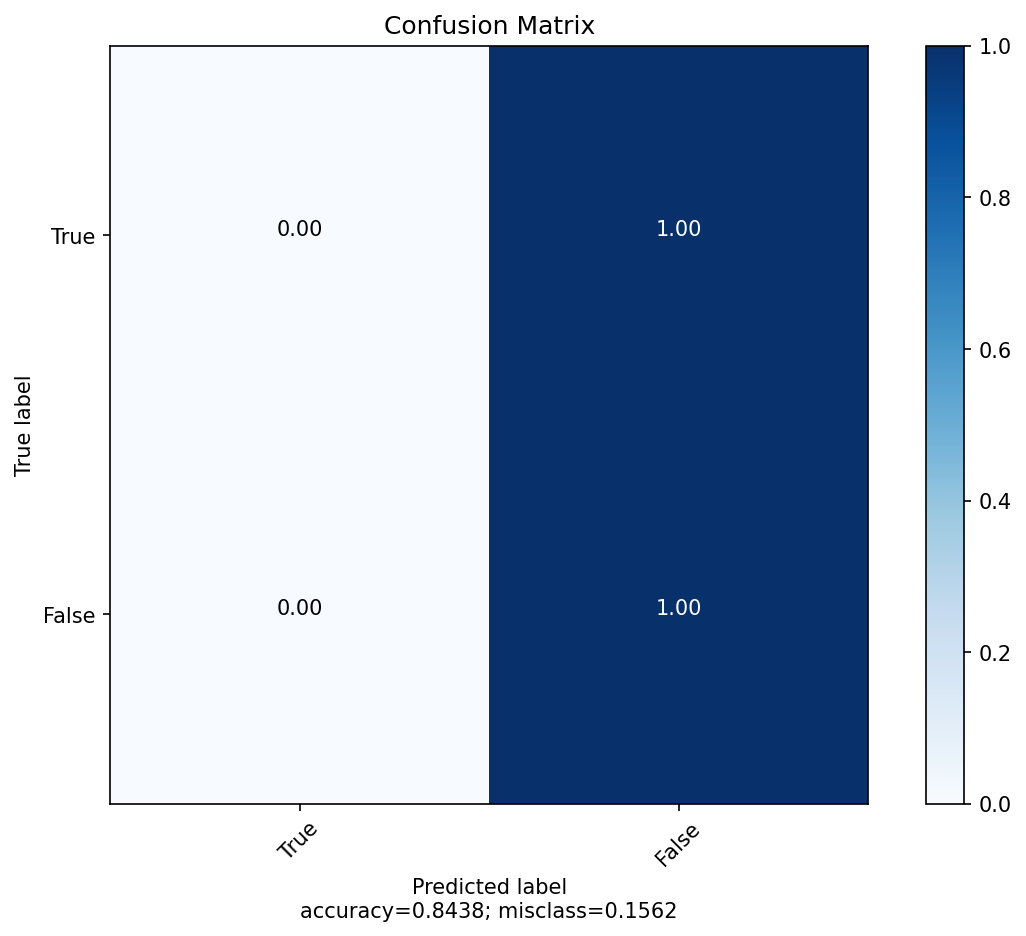

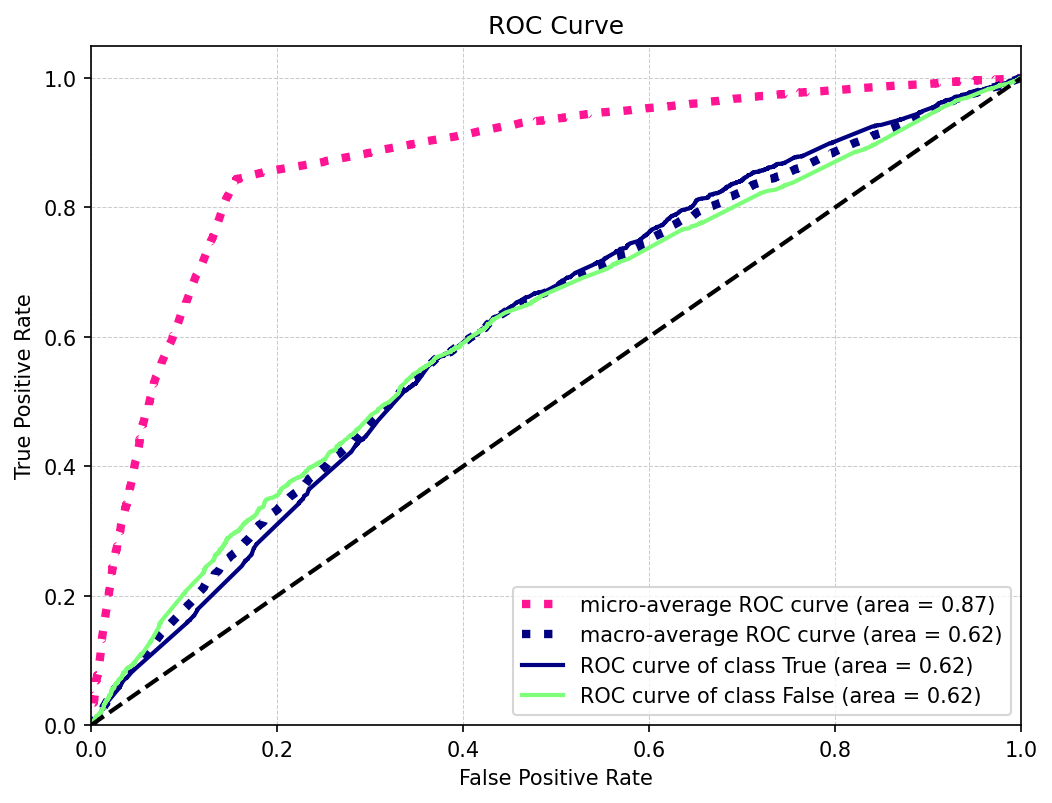

In [93]:
sacp_framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')
sacp_framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)
sacp_framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)